In [1]:
import numpy as np
import pandas as pd

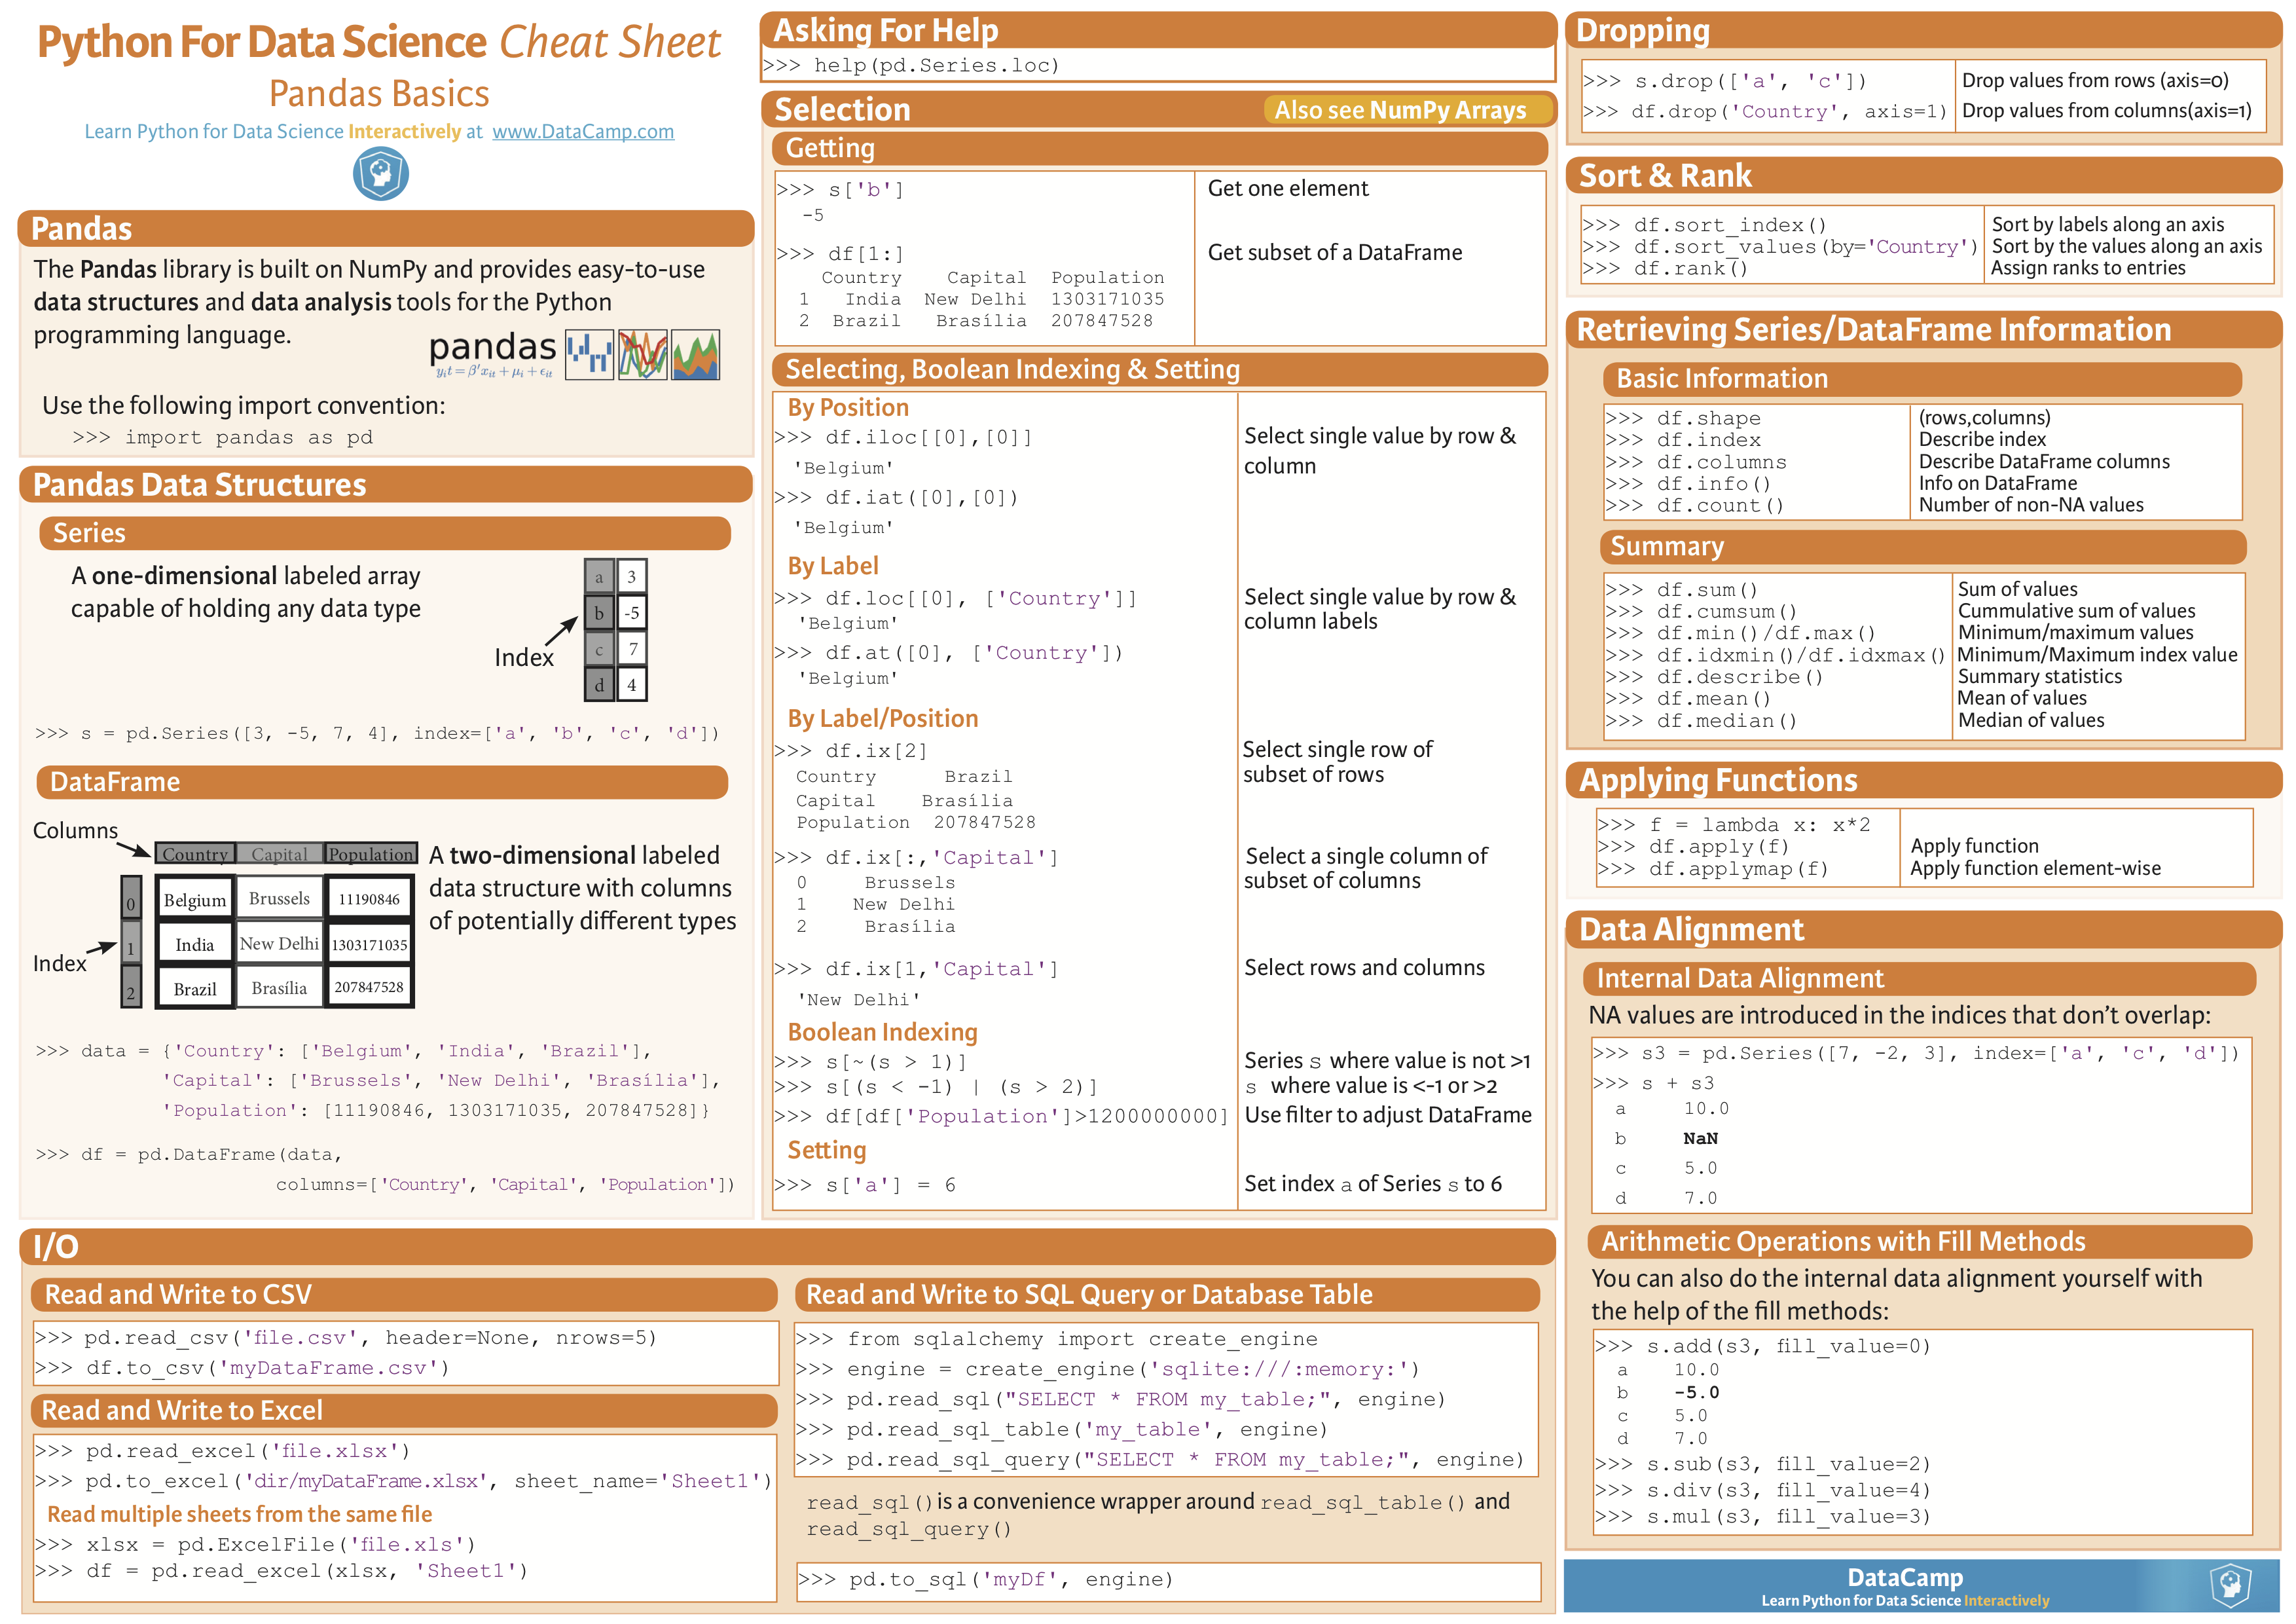

In [2]:
from IPython.display import Image
Image("Python_Pandas_Cheat_Sheet_1.png")

In [3]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

C:\Users\Roko\anaconda3\envs\kegglefirst\lib\inspect.py:441: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  srch_obj = srch_cls.__getattr__(cls, name)
C:\Users\Roko\anaconda3\envs\kegglefirst\lib\pydoc.py:216: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  fields = getattr(object, '_fields', [])


# Create dataframe

In [4]:
dataset = { 
    'name':['Zagreb', 'Rijeka', 'Split', 'Osijek', 'Dubrovnik'], 
    'avg_salary': [6359, 5418, 5170, 4892, 5348], 
    'population': [790017, 128384, 167121, 84104, 28434], 
    'tax': [18, 15, 10, 13, 10]
}
dataset

{'name': ['Zagreb', 'Rijeka', 'Split', 'Osijek', 'Dubrovnik'],
 'avg_salary': [6359, 5418, 5170, 4892, 5348],
 'population': [790017, 128384, 167121, 84104, 28434],
 'tax': [18, 15, 10, 13, 10]}

In [5]:
crocities = pd.DataFrame(dataset)
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,18
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [6]:
emptydf = pd.DataFrame(columns = ['name', 'number', 'top_salary'])
emptydf

,name,number,top_salary


In [7]:
emptydf.loc[1] = ['Zagreb', 1, 10000]
emptydf.loc[0] = ['Zagreb', 2, 20000]
emptydf.loc[2] = ['Zagreb', 3, 30000]

In [8]:
emptydf

,name,number,top_salary
1,Zagreb,1,10000
0,Zagreb,2,20000
2,Zagreb,3,30000


In [9]:
emptydf.reset_index()

,index,name,number,top_salary
0,1,Zagreb,1,10000
1,0,Zagreb,2,20000
2,2,Zagreb,3,30000


# Save and load

CSV

In [10]:
crocities.to_csv("crocities.csv")

In [11]:
loaded = pd.read_csv("crocities.csv")

EXCEL

In [12]:
crocities.to_excel("crocities.xlsx", sheet_name='sh1')

In [13]:
loaded = pd.read_excel("crocities.xlsx")

# Grab elements

In [14]:
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,18
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


### subset

In [15]:
crocities[1:3]

,name,avg_salary,population,tax
1,Rijeka,5418,128384,15
2,Split,5170,167121,10


In [16]:
crocities['name']

0       Zagreb
1       Rijeka
2        Split
3       Osijek
4    Dubrovnik
Name: name, dtype: object

### by position / label

In [17]:
crocities.iloc[[0],[1]]

,avg_salary
0,6359


In [18]:
crocities.loc[[2],['population']]

,population
2,167121


In [19]:
crocities.loc[:3,'population']

0    790017
1    128384
2    167121
3     84104
Name: population, dtype: int64

In [20]:
crocities.loc[2,'population']

167121

### bool indexing

In [21]:
crocities[~(crocities['population'] > 130000)] # population < 130k

,name,avg_salary,population,tax
1,Rijeka,5418,128384,15
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [22]:
crocities[(crocities['population'] > 200000) | (crocities['population'] < 50000)]

,name,avg_salary,population,tax
0,Zagreb,6359,790017,18
4,Dubrovnik,5348,28434,10


# Copying, adding, appending
### Copy

In [23]:
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,18
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [24]:
crocities_pointer = crocities.copy(deep=False)
crocities_pointer.loc[crocities_pointer['name'] == 'Zagreb', ['tax']] = 15
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


### add new row

In [25]:
newrow = pd.DataFrame(columns = ['name', 'avg_salary', 'population', 'tax'])

In [26]:
newrow.loc[len(newrow.index)] = ['Zadar', '6000','75000','12']
newrow.loc[len(newrow.index)] = ['Vukovar', '5100','12000','11']
newrow

,name,avg_salary,population,tax
0,Zadar,6000,75000,12
1,Vukovar,5100,12000,11


### Combine df

In [27]:
crocities.append(newrow).reset_index().drop('index', axis=1)

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10
5,Zadar,6000,75000,12
6,Vukovar,5100,12000,11


In [28]:
pd.concat([crocities,newrow])

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10
0,Zadar,6000,75000,12
1,Vukovar,5100,12000,11


### Merge

In [29]:
emptydf2 = emptydf.drop(1).drop(2)
emptydf2

,name,number,top_salary
0,Zagreb,2,20000


In [30]:
crocities.join(emptydf2, lsuffix='_left', rsuffix='_right')

,name_left,avg_salary,population,tax,name_right,number,top_salary
0,Zagreb,6359,790017,15,Zagreb,2,20000
1,Rijeka,5418,128384,15,NaN,NaN,NaN
2,Split,5170,167121,10,NaN,NaN,NaN
3,Osijek,4892,84104,13,NaN,NaN,NaN
4,Dubrovnik,5348,28434,10,NaN,NaN,NaN


In [31]:
crocities.merge(emptydf2, left_on='name', right_on='name', how='outer')

,name,avg_salary,population,tax,number,top_salary
0,Zagreb,6359,790017,15,2,20000
1,Rijeka,5418,128384,15,NaN,NaN
2,Split,5170,167121,10,NaN,NaN
3,Osijek,4892,84104,13,NaN,NaN
4,Dubrovnik,5348,28434,10,NaN,NaN


In [32]:
crocities.merge(emptydf2, left_on='name', right_on='name', how='inner')

,name,avg_salary,population,tax,number,top_salary
0,Zagreb,6359,790017,15,2,20000


# Series

In [33]:
s = pd.Series([3, -5, 7, 4], index = ['a','b','c','d'])
s

a    3
b   -5
c    7
d    4
dtype: int64

In [34]:
s[s >= 4]

c    7
d    4
dtype: int64

In [35]:
s['c']

7

In [36]:
s['e'] = 10

In [37]:
s

a     3
b    -5
c     7
d     4
e    10
dtype: int64

# SQL

In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')

In [39]:
crocities.to_sql('crocities', engine)

In [40]:
pd.read_sql("SELECT * FROM crocities;", engine)

,index,name,avg_salary,population,tax
0,0,Zagreb,6359,790017,15
1,1,Rijeka,5418,128384,15
2,2,Split,5170,167121,10
3,3,Osijek,4892,84104,13
4,4,Dubrovnik,5348,28434,10


In [41]:
pd.read_sql_table('crocities', engine)

,index,name,avg_salary,population,tax
0,0,Zagreb,6359,790017,15
1,1,Rijeka,5418,128384,15
2,2,Split,5170,167121,10
3,3,Osijek,4892,84104,13
4,4,Dubrovnik,5348,28434,10


# Dropping

In [42]:
s

a     3
b    -5
c     7
d     4
e    10
dtype: int64

In [43]:
s.drop(['a','e'])

b   -5
c    7
d    4
dtype: int64

In [44]:
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [45]:
crocities.drop(2)

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [46]:
crocities.drop('tax',axis=1)

,name,avg_salary,population
0,Zagreb,6359,790017
1,Rijeka,5418,128384
2,Split,5170,167121
3,Osijek,4892,84104
4,Dubrovnik,5348,28434


# Sort and rank

In [47]:
crocities = crocities.sort_values(by='tax');
crocities

,name,avg_salary,population,tax
2,Split,5170,167121,10
4,Dubrovnik,5348,28434,10
3,Osijek,4892,84104,13
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15


In [48]:
crocities = crocities.sort_index()
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [49]:
crocities.rank()

,name,avg_salary,population,tax
0,5.0,5.0,5.0,4.5
1,3.0,4.0,3.0,4.5
2,4.0,2.0,4.0,1.5
3,2.0,1.0,2.0,3.0
4,1.0,3.0,1.0,1.5


# Basic info

In [50]:
crocities.shape

(5, 4)

In [51]:
crocities.describe()

,avg_salary,population,tax
count,5.000000,5.000000,5.00000
mean,5437.400000,239612.000000,12.60000
std,553.777753,311990.049055,2.50998
min,4892.000000,28434.000000,10.00000
25%,5170.000000,84104.000000,10.00000
50%,5348.000000,128384.000000,13.00000
75%,5418.000000,167121.000000,15.00000
max,6359.000000,790017.000000,15.00000


In [52]:
crocities.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [53]:
crocities.columns

Index(['name', 'avg_salary', 'population', 'tax'], dtype='object')

In [54]:
crocities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        5 non-null      object
 1   avg_salary  5 non-null      int64 
 2   population  5 non-null      int64 
 3   tax         5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 200.0+ bytes


In [55]:
crocities.count() # number of non-NA values

name          5
avg_salary    5
population    5
tax           5
dtype: int64

# Summary

In [56]:
crocities

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,Rijeka,5418,128384,15
2,Split,5170,167121,10
3,Osijek,4892,84104,13
4,Dubrovnik,5348,28434,10


In [57]:
crocities.sum()

name          ZagrebRijekaSplitOsijekDubrovnik
avg_salary                               27187
population                             1198060
tax                                         63
dtype: object

In [58]:
crocities.cumsum()

,name,avg_salary,population,tax
0,Zagreb,6359,790017,15
1,ZagrebRijeka,11777,918401,30
2,ZagrebRijekaSplit,16947,1085522,40
3,ZagrebRijekaSplitOsijek,21839,1169626,53
4,ZagrebRijekaSplitOsijekDubrovnik,27187,1198060,63


In [59]:
crocities.min()

name          Dubrovnik
avg_salary         4892
population        28434
tax                  10
dtype: object

In [60]:
crocities['population'].idxmin()

4

In [61]:
crocities.describe()

,avg_salary,population,tax
count,5.000000,5.000000,5.00000
mean,5437.400000,239612.000000,12.60000
std,553.777753,311990.049055,2.50998
min,4892.000000,28434.000000,10.00000
25%,5170.000000,84104.000000,10.00000
50%,5348.000000,128384.000000,13.00000
75%,5418.000000,167121.000000,15.00000
max,6359.000000,790017.000000,15.00000


In [62]:
crocities.mean()

avg_salary      5437.4
population    239612.0
tax               12.6
dtype: float64

In [63]:
crocities.median()

avg_salary      5348.0
population    128384.0
tax               13.0
dtype: float64

# Applying functions

In [64]:
f = lambda x: x*2

In [65]:
crocities.apply(f)

,name,avg_salary,population,tax
0,ZagrebZagreb,12718,1580034,30
1,RijekaRijeka,10836,256768,30
2,SplitSplit,10340,334242,20
3,OsijekOsijek,9784,168208,26
4,DubrovnikDubrovnik,10696,56868,20


In [66]:
crocities.applymap(f) # element-wise

,name,avg_salary,population,tax
0,ZagrebZagreb,12718,1580034,30
1,RijekaRijeka,10836,256768,30
2,SplitSplit,10340,334242,20
3,OsijekOsijek,9784,168208,26
4,DubrovnikDubrovnik,10696,56868,20


# Data alignment

In [67]:
s

a     3
b    -5
c     7
d     4
e    10
dtype: int64

In [68]:
s2 = pd.Series([1, -1], index = ['a','c'])

In [69]:
s + s2

a    4.0
b    NaN
c    6.0
d    NaN
e    NaN
dtype: float64

In [70]:
s.add(s2,fill_value = 0)

a     4.0
b    -5.0
c     6.0
d     4.0
e    10.0
dtype: float64

In [71]:
s.sub(s2,fill_value = 0)

a     2.0
b    -5.0
c     8.0
d     4.0
e    10.0
dtype: float64

In [72]:
s.div(s2,fill_value = 1)

a     3.0
b    -5.0
c    -7.0
d     4.0
e    10.0
dtype: float64

In [73]:
s.mul(s2,fill_value = 0)

a    3.0
b   -0.0
c   -7.0
d    0.0
e    0.0
dtype: float64